In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sc
from scipy.stats import mode
import scipy.stats as stats
sns.set(rc={'figure.figsize': (10, 5)}, style="whitegrid")

•	ad_id – идентификатор объявления (рекламы)  
•	xyz_campaign_id – идентификатор рекламной кампании в базе компании X  
•	fb_campaign_id – идентификатор кампании в Facebook  
•	age – возрастная группа, которой показывалась реклама  
•	gender – пол тех, кому показывалась реклама  
•	interest –код, указывающий категорию, к которой относится интерес пользователя (соответствие число – интерес, условно: 1 – животные, 2 – автомобили, 3 – тортики и т.д.)  
•	impressions – число показов  
•	clicks – число кликов  
•	spent – сумма, которую компания потратила на показ объявления   
•	total_conversion – количество людей, которые заинтересовались продуктом после просмотра рекламы  
•	approved_conversion – количество людей, которые купили продукт после просмотра рекламы

In [2]:
df = pd.read_csv('2_conversion.csv', encoding='utf-8')
df

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.430000,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.820000,2,0
2,708771,916,103920,30-34,M,20,693,0,0.000000,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.250000,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.290000,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710001,8,2


1.	Загрузите данные, проверьте число наблюдений и столбцов, типы данных, наличие пропущенных значений, какие уникальные значения встречаются. Сколько уникальных компаний было проведено?

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


In [9]:
df.describe()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007,0.000164
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708,0.000115
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000,0.000100
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000,0.000160
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000,0.000234
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000,0.001059


In [5]:
df.isna().sum()

ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64

In [6]:
df.xyz_campaign_id.unique()

array([ 916,  936, 1178])

In [7]:
df['xyz_campaign_id'].nunique()

3

2.	Постройте график распределения числа показов (Impressions) для каждой рекламной компании в Facebook, прологарифмировав значения.

<Axes: xlabel='Impressions', ylabel='Count'>

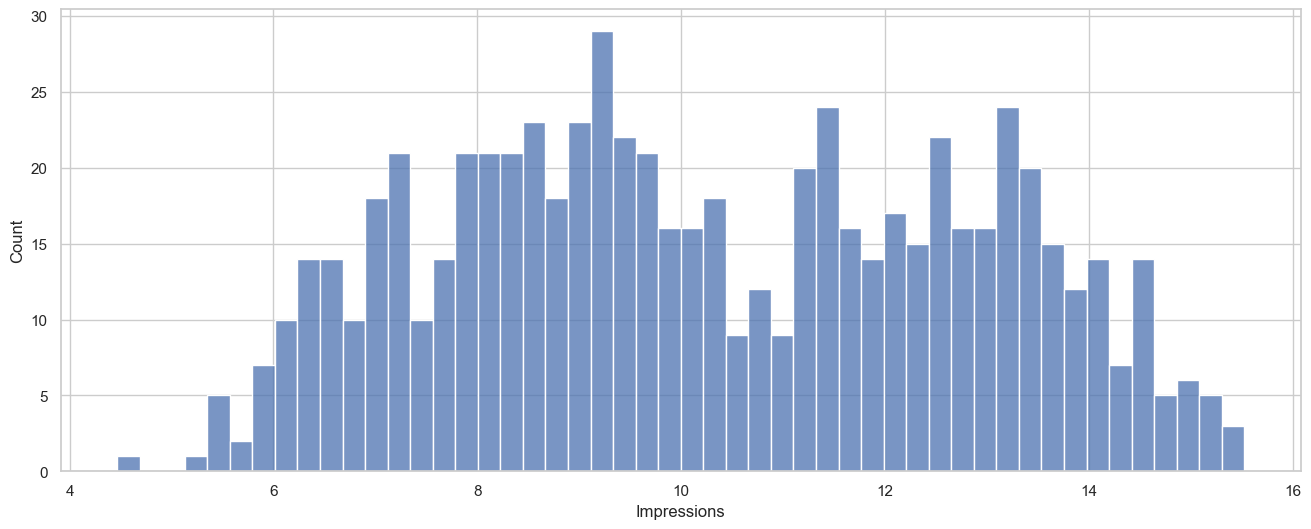

In [3]:
sns.histplot(np.log(df.groupby('fb_campaign_id').Impressions.sum()), kde=False, bins=50)

In [4]:
df_grouped = df.groupby(['xyz_campaign_id', 'fb_campaign_id'], as_index=False).Impressions.sum()
df_grouped["Impressions"] = np.log(df_grouped["Impressions"])
df_grouped["xyz_campaign_id"] = df_grouped["xyz_campaign_id"].astype("str")
df_grouped.head()

,xyz_campaign_id,fb_campaign_id,Impressions
0,916,103916,8.902456
1,916,103917,9.790375
2,916,103920,6.541030
3,916,103928,9.035034
4,916,103929,7.557473


<Axes: xlabel='Impressions', ylabel='Count'>

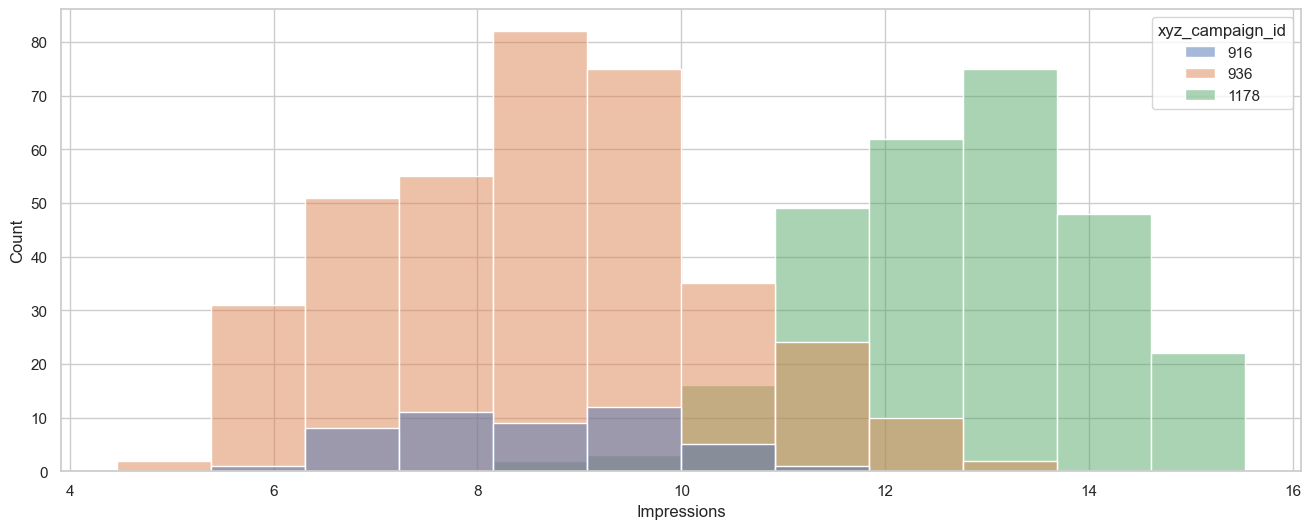

In [5]:
sns.histplot(data=df_grouped, x="Impressions", hue="xyz_campaign_id")

In [6]:
# кластеризация
from sklearn.mixture import GaussianMixture # метод кластеризации
dat = np.log(df.groupby('fb_campaign_id').Impressions.sum()).values.reshape(-1, 1) # подготока данных
mix = GaussianMixture(n_components=2).fit(dat) # построение модели
labels = mix.predict(dat) # вычисление принадлежности

<Axes: ylabel='Count'>

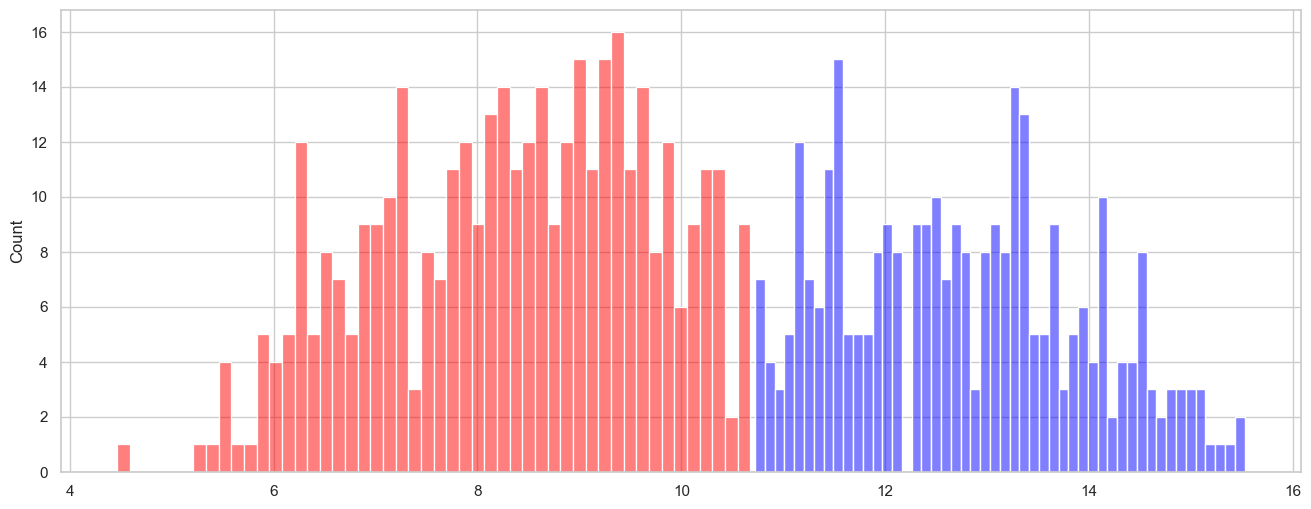

In [7]:
dat_1d = dat.ravel()
sns.histplot(dat_1d[labels == 0], kde=False, bins=50, color="blue", alpha=0.5, label="Cluster 0")
sns.histplot(dat_1d[labels == 1], kde=False, bins=50, color="red", alpha=0.5, label="Cluster 1")

3.	Создайте новую колонку c CTR. Посмотрите на описательные статистики и распределение. Укажите ad_id объявления с наибольшим CTR. CTR = cliks/impressoins

In [8]:
df['CTR'] = df.Clicks / df.Impressions

In [10]:
df['CTR'].describe()

count    1143.000000
mean        0.000164
std         0.000115
min         0.000000
25%         0.000100
50%         0.000160
75%         0.000234
max         0.001059
Name: CTR, dtype: float64

In [24]:
df.set_index("ad_id").CTR.idxmax()

np.int64(738637)

4.	Визуализируйте CTR с разбивкой по номеру рекламной кампании (xyz_campaign_id). Визуализируйте график 916 компании

In [47]:
df_grouped = df.groupby(['xyz_campaign_id', 'fb_campaign_id'], as_index=False).CTR.sum()
df_grouped["CTR"] = np.log(df_grouped["CTR"])
df_grouped["xyz_campaign_id"] = df_grouped["xyz_campaign_id"].astype("str")
df_grouped.head()

c:\Users\MedTech\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,xyz_campaign_id,fb_campaign_id,CTR
0,916,103916,-8.902456
1,916,103917,-9.097228
2,916,103920,-inf
3,916,103928,-7.648514
4,916,103929,-inf


<Axes: xlabel='CTR', ylabel='Count'>

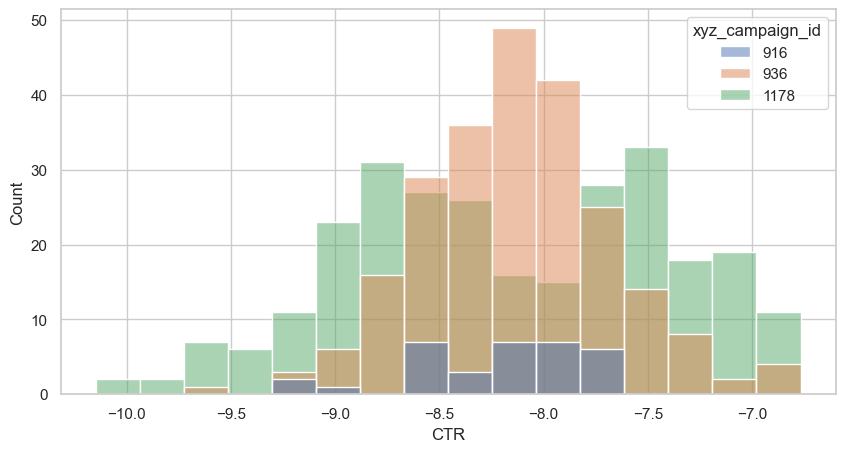

In [52]:
sns.histplot(data=df_grouped, x="CTR", hue="xyz_campaign_id")

<Axes: xlabel='CTR', ylabel='Count'>

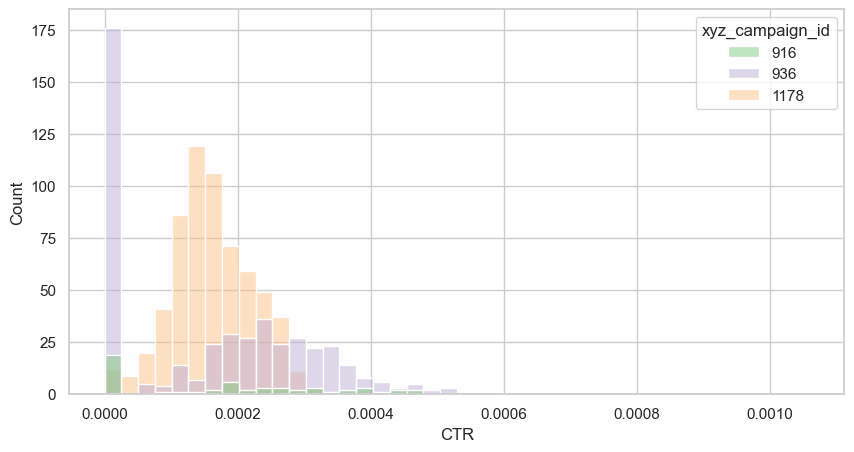

In [51]:
sns.histplot(data=df, x='CTR', hue='xyz_campaign_id', palette="Accent")

<Axes: xlabel='CTR', ylabel='Count'>

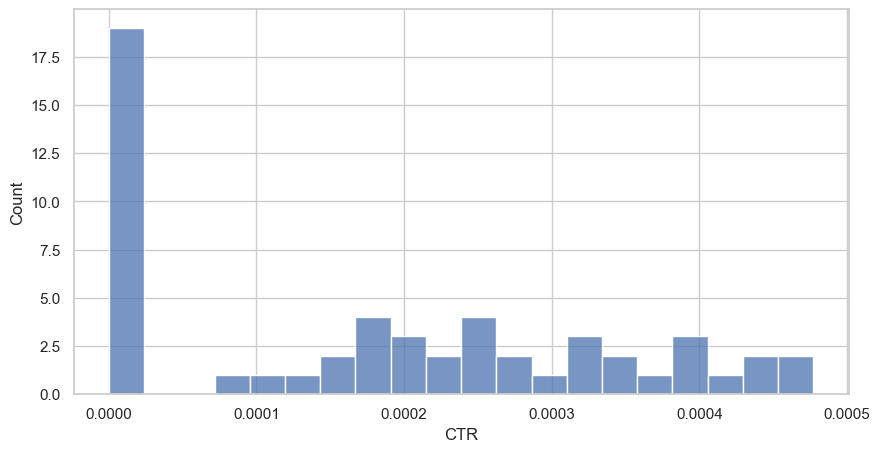

In [50]:
sns.histplot(x=df.query('xyz_campaign_id == 916').CTR, bins=20)

5. CPC (cost per click) -стоимость за клик пользователя по объявлению. Расчитайте путем деления суммы потраченных денег на общее число кликов: CPC = spent/clikc.  
Выведите описательные статистики для новой переменной, посмотрите на форму распределения. В ответе укажите межквартильный размах, округленный до двух знаков запятой.  
Обратите внимание, что в столбце могут встречатся NaN. Если вы используете функцию iqr из scipy, то следует казать аргумент 'nan_poicity = omit', что бы их проигнорировать. При построении графика необходимо использовать метод .dropna().  
Визуализируйте срс с разбивкой по полу пользователей, которым были показаны объявления.

In [55]:
df['cpc'] = df.Spent / df.Clicks

In [56]:
df['cpc'].describe()

count    936.000000
mean       1.499347
std        0.232879
min        0.180000
25%        1.390000
50%        1.498273
75%        1.644364
max        2.212000
Name: cpc, dtype: float64

In [72]:
from scipy.stats import iqr

In [81]:
iqr(df.dropna()['cpc']).round(2)

np.float64(0.25)

In [82]:
iqr(df.cpc, nan_policy='omit').round(2)

np.float64(0.25)

<Axes: xlabel='cpc', ylabel='Count'>

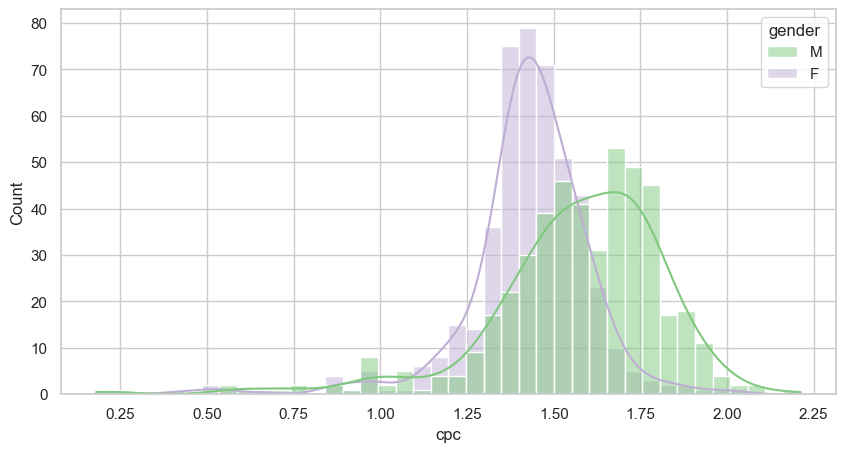

In [84]:
sns.histplot(data=df.dropna(), x='cpc', hue='gender', palette="Accent", kde=True)

Конверсия (conversion_rate) - отношение числа пользователей, совершивших целевое действие на определенном этапе, к общему числу тех, кто дошел до данного этапа.   
Посчитайте конверсию из клика в покупку. В качестве ответа укажите конверсию для объявления 1121814 в процентах, округлив значение до 2 знаков. 

In [97]:
df['conv_rate'] = (df.Approved_Conversion / df.Clicks).round(2)
df['conv_rate'].describe()

c:\Users\MedTech\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


count    1007.00
mean         inf
std          NaN
min         0.00
25%         0.00
50%         0.02
75%         0.10
max          inf
Name: conv_rate, dtype: float64

In [101]:
round(df.query('ad_id == 1121814')['conv_rate']*100,2)

860    3.0
Name: conv_rate, dtype: float64

In [99]:
df.query('ad_id == 1121814').conv_rate.round(2)

860    0.03
Name: conv_rate, dtype: float64